# The Trap of Not Being Able to Take Risks

Some risks are worth taking. For a casino, it is worth risking their wealth since the games have odds that are in the casino's favor. This doesn't mean there's no chance the casino will ever lose all of its wealth. But that such a loss would be extremely unlikely. Some other risks are not worth taking. Feeling the wind on your hair is not worth the risk of riding a motorcycle without a helmet. 

What makes a risk worth taking or not is it's expected payoff. Simply put, it's the balance between what you stand to gain and what you stand to lose, weighted by the likelihood of each possible outcome. If you stand to win a lot relative to what you stand to lose, then the risk is worth taking. In more precise terms, risk-taking is about expected value. Expected value is the sum, weighted by likelihood, of each possible outcome. If you stand to gain $\$10$ from a coin flip that turns out heads and lose $\$5$ if it tourns out tails, the expected value is $\$10 \times 0.5 + -\$5 \times 0.5 = \$2.5$. Expected value thus allows us to compare different risky options. The option with the highest expected value is the one you should take. 

However, you should only choose based on expected value if the payoffs in your calculation include all that you care about. Suppose your friend offers you the coin toss above. However, you are far from your home and all you have in your wallet is $\$5$. You are also planning to use those $\$5$ to go to the cinema, and if you lose them, you will not be able to catch your movie and will be bored for the rest of the afternoon. Let's say you value going to the cinema at $\$5$, which is indeed the price of the ticket and that you value not being bored in the afternoon at $\$20$, in that you would be willing to pay that amount for you not to be bored (if you indeed had $\$20$). We can then put out problem the following way:
- Heads: $\$10 \times 0.5 = \$5$
- Tails: $(-\$5 -\$20) \times 0.5 = -\$7.5$
The expected value of the toss will be Heads + Tails = $-\$2.5$. Notice how once we included how you supposedly feel about what happens as a result of the bet then its expected value becomes negative, whereas if you just include the immediate monetary values, it is positive. 

So, what ultimately determines whether you should take a given risk is if it is the action that maximizes your expected value. This could mean you don't take any risk, but it could also mean you take one of many risks - depending on which has the highest expected value.

### Opportunities
It isn't news that people with more wealth often have better opportunities to choose options with higher expected value. They can, for example, enjoy fancier meals, and go to fancier colleges. They thus have the advantage of having enough wealth to be able to pay for things that less fortunate people cannot. This often means wealthier individuals get to engage in better wealth-increasing actions. One exmaple is that certain kinds of investments only open once you can invest more than a certain sum. And if you are really poor, you don't even have the extra income to buy a single stock, or to put your money on a savings account.

There is, however, another kind of lack of opportunity that is created by poverty: the inability to take certain kinds of risks. What I want to focus on here is that sometimes you may technically have the sum of money necessary for taking a certain risk that has immediate has positive expected monetary value, but this may still not be worth doing because your wealth is too low. Here I say "immediate monetary value" to enphasize that we are not talking about the expected value all things considered, but the expected monetary gain of the immediate outcome of a bet. 

So, how is this possible? The amount of wealth you start with determines how much you can afford to lose before you have to stop playing the game. Here the game is taking or not taking certain bets, and this is supposed to be a metaphor for life. Life is in a sense a series of bets; you are always choosing between different actions, each with its set of potential outcomes and payoffs. If you can afford to lose a lot before going bust, then you can more easily overcome the few negative outcomes of a bad bet and move on to accumulating even more wealth and ultimately increasing your wealth significantly. However, if a single bad outcome of a bet gets you really close to going bust, then even if the bet has positive expected value and its bad outcome has only a small chance of happening, getting the bad outcome once or twice already gets you out of the game.

Here is an illustration: consider a coin toss in which you stand to gain $\$200$ with $50\%$ chance and lose $\$100$ with $50\%$ chance. This I will call the *risky* bet. This in fact is an important bet for the field of decision theory, since economist Paul Samuelson offered it to a friend, who refused it. Since then, this bet has been in the core of a lot of debates over the rationality of risk averison. Consider too the *safe* bet in which you stand to gain $\$40$ with $50\%$ chance and $\$0$ with $50\%$. The strictly monetary expected value of the *risky* bet is $\$50$ and it is $\$20$ for the *safe* bet. 

I will now try to model what would happen in soemone's life if they were to continuously act by taking either *risky* or *safe* bets. I'll do this by simulating many people with different initial wealth levels taking sequences of the two distinct bets.

In [2]:
#loading packages
import math 
import sympy
import numpy as np
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [10]:
#risky bet setup
def risky_bet(x):
    roll = random.randint(1,100)
    if roll <= 50:
        return 200
    elif roll >= 51:
        return -100

In [9]:
#safe bet setup
def safe_bet(x):
    roll = random.randint(1,100)
    if roll <= 50:
        return 40
    elif roll >= 51:
        return 0

In [11]:
#setup simulations
def monte_carlo(num_samples, starting_wealth, bet_fun):
    
    total_wealth = starting_wealth
    
    for i in range(num_samples):
        x = random.random()
        if total_wealth < 100:
            break
        else:
            total_wealth += bet_fun(x)
            if total_wealth <= 0:
                break
            
    return total_wealth

#returns proportion of people who lost all their wealth and average wealth of those who did not lose all their wealth
def sim_bets(num_people, starting_wealth, num_bets, bet_fun):
    c = 0
    sum_money = 0
    for i in range(num_people):
        result = monte_carlo(num_bets, starting_wealth, bet_fun)
        if result <= 0:
            c += 1
        else:
            c += 0
            sum_money += result
            
    avg_money = sum_money/(num_people-c)
    dead_alive = np.array([f'{c/num_people:.5f}', f'{avg_money:.5f}'])
    return dead_alive

In [14]:
#Calling functions 

#1. Number of people and number of bets
num_bets = 1000
num_people = 10000
rich = 1000
poor = 100

#2. Getting outcomes
safe_rich = sim_bets(num_people, rich, num_bets, safe_bet)
safe_poor = sim_bets(num_people, poor, num_bets, safe_bet)

risky_rich = sim_bets(num_people, rich, num_bets, risky_bet)
risky_poor = sim_bets(num_people, poor, num_bets, risky_bet)

#3. Get expected values
EV_safe_rich = (float(safe_rich[0]))*0 + (1-(float(safe_rich[0])))*float(safe_rich[1])
EV_safe_poor = (float(safe_poor[0]))*0 + (1-(float(safe_poor[0])))*float(safe_poor[1])
EV_risky_rich = (float(risky_rich[0]))*0 + (1-(float(risky_rich[0])))*float(risky_rich[1])
EV_risky_poor = (float(risky_poor[0]))*0 + (1-(float(risky_poor[0])))*float(risky_poor[1])

#4. Print values
print("Expected value poor going safe: ", EV_safe_poor)
print("Expected value poor going risky: ", EV_risky_poor)
print("Expected value rich going safe: ", EV_safe_rich)
print("Expected value rich going risky: ", EV_risky_rich)

Expected value poor going safe:  20102.148
Expected value poor going risky:  19318.829998804
Expected value rich going safe:  20984.416
Expected value rich going risky:  50604.299999808


Our results come from simulating $10000$ people taking $1000$ sequential bets in each of the four categories. We have seen that if you start out with $\$100$, you are better off only taking the safe bet, despite it having lower expected value. However, if you start out with $\$1000$, then you are better off taking the sequence of *risky* bets.

Note that an important factor in generating these results is that if someone's wealth gets below $\$100$, they cannot take the *risky* bet, since they don't have enough to pay in case they get the bad outcome of this bad. 

So, when you start out with more, you have more chances to lose the bet before you need to stop playing. You can lose 10 consecutive bets before you need to stop. If you start out with $\$100$ and lose on the first bet, or win the first and lose three consecutive bets you are already out of the game. 

Furtheremore, having more initial wealth gives you an additional advantage to taking opportunities that are literally not available to others. It also lets you take advantage of opportunities that are technically available to the less fortunate, but which the less fortunate are better off not taking because of the high level of risk these actions represent for them.

## Appendix: at what number of bets is it better to be safe if you start out 'poor'?

In [79]:
def get_risky_list():
    for i in range(len(list_num_bets)):
        sim_result = sim_bets(num_people, poor, list_num_bets[i], risky_bet)
        list_risky.append((1-(float(sim_result[0])))*float(sim_result[1]))
    return list_risky

def get_safe_list():
    for i in range(len(list_num_bets)):
        sim_result = sim_bets(num_people, poor, list_num_bets[i], safe_bet)
        list_safe.append((1-(float(sim_result[0])))*float(sim_result[1]))
    return list_safe

Here we see that with relatively low values ($<1000$) the expected value difference between being risky and being safe is unstable.

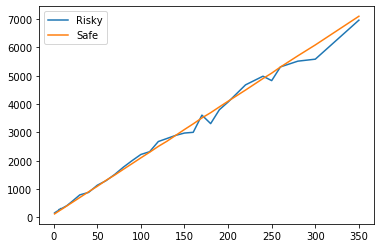

In [103]:
#obtaining the lists of results 
num_people = 1000

list_num_bets = [1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,
                200,220,240,250,260,280,300,350]

list_risky = []
list_safe = []

risky_results = get_risky_list()
safe_results = get_safe_list()

#plot
num_bets = list_num_bets

fig, ax = plt.subplots()
ax.plot(num_bets, risky_results, label="Risky")
ax.plot(num_bets, safe_results, label="Safe")
ax.legend()

plt.show()

And here we see that once we go past $1000$ bets, being safe is better significantly more times than being risky.

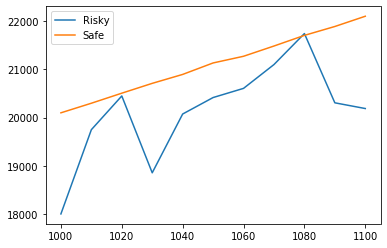

In [107]:
#obtaining the lists of results LARGE NUMBERS
num_people = 1000

list_num_bets = [1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100]

list_risky = []
list_safe = []

risky_results = get_risky_list()
safe_results = get_safe_list()

#plot
num_bets = list_num_bets

fig, ax = plt.subplots()
ax.plot(num_bets, risky_results, label="Risky")
ax.plot(num_bets, safe_results, label="Safe")
ax.legend()

plt.show()